# Big Mart Sales Prediction

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

### importing the dataset

In [2]:
# importing the test and train csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
## Data exploration of Train Data

In [4]:
print('dimension of train set are {}\ndimension of test set are {}\n'.format(train.shape,test.shape))

dimension of train set are (8523, 12)
dimension of test set are (5681, 11)



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
## Extracting X and y from train dataset
X = train.iloc[:,0:-1]
y =train['Item_Outlet_Sales']
print("Xtrain shape is {}\nytrain shape is {}\n".format(X.shape,y.shape))

Xtrain shape is (8523, 11)
ytrain shape is (8523,)



In [9]:
# Outlet_Establishment_year does not carry any significance so adding the age of Outlet
# adding extra feature of Outlet_Age = max(Outlet_Establishment_Year)-(Outlet_Establishment_year)
X['Outlet_Age']=X['Outlet_Establishment_Year'].max() - X['Outlet_Establishment_Year']

In [10]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,11
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,22


In [11]:
# at first droping item identifier , outlet_identifier , outlet establishment year
X = X.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [12]:
### Item visibilty of 0 does not make any sense so imputing these 0 values with nan

In [13]:
X['Item_Visibility']=X['Item_Visibility'].mask(X['Item_Visibility']==0.0)

In [14]:
# missing values
X.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility          526
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Age                 0
dtype: int64

In [15]:
### missing values imputation

In [16]:
X['Item_Weight'].fillna(X['Item_Weight'].mean(),inplace=True)
X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0],inplace=True)
X['Item_Visibility'].fillna(X['Item_Visibility'].mean(),inplace=True)

In [17]:
X.isna().sum()


Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Outlet_Age              0
dtype: int64

In [18]:
# checking the categorical variables
X['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
# Unifying categories to Low Fat and Regular only
X['Item_Fat_Content'] = X['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [20]:
X['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
# Label encoding the categorical variables.

In [22]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
X['Item_Fat_Content']=label_encoder.fit_transform(X['Item_Fat_Content']) 
#,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
X['Outlet_Size']=label_encoder.fit_transform(X['Outlet_Size'])
X['Outlet_Location_Type']=label_encoder.fit_transform(X['Outlet_Location_Type'])
X['Outlet_Type']=label_encoder.fit_transform(X['Outlet_Type'])
X['Item_Type']=label_encoder.fit_transform(X['Item_Type'])
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,9.30,0,0.016047,4,249.8092,1,0,1,10
1,5.92,1,0.019278,14,48.2692,1,2,2,0
2,17.50,0,0.016760,10,141.6180,1,0,1,10
3,19.20,1,0.070482,6,182.0950,1,2,0,11
4,8.93,0,0.070482,9,53.8614,0,2,1,22


In [23]:
### checking correlation to check if there is any highly correlated variable
X.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
Item_Weight,1.000000,-0.021157,-0.017763,0.028015,0.024756,-0.007225,0.004088,-0.000566,0.008301
Item_Fat_Content,-0.021157,1.000000,0.049915,-0.139434,0.006063,-0.000622,-0.001598,0.002199,-0.003151
Item_Visibility,-0.017763,0.049915,1.000000,-0.035922,-0.005515,0.072297,-0.027742,-0.179380,0.078316
Item_Type,0.028015,-0.139434,-0.035922,1.000000,0.032651,-0.001859,0.003084,0.003053,-0.004970
Item_MRP,0.024756,0.006063,-0.005515,0.032651,1.000000,0.006059,0.000232,-0.001975,-0.005020
Outlet_Size,-0.007225,-0.000622,0.072297,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.193389
Outlet_Location_Type,0.004088,-0.001598,-0.027742,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089216
Outlet_Type,-0.000566,0.002199,-0.179380,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.122304
Outlet_Age,0.008301,-0.003151,0.078316,-0.004970,-0.005020,-0.193389,0.089216,0.122304,1.000000


In [24]:
print("X shape is {} \ny shape is {} \n".format(X.shape,y.shape))

X shape is (8523, 9) 
y shape is (8523,) 



In [25]:
#normalizing the X from 0 to 1 using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(X)
X[:5]

array([[0.28252456, 0.        , 0.03839895, 0.26666667, 0.92750715,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.08127419, 1.        , 0.04834585, 0.93333333, 0.0720684 ,
        0.5       , 1.        , 0.66666667, 0.        ],
       [0.77076511, 0.        , 0.04059334, 0.66666667, 0.46828841,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.87198571, 1.        , 0.20598459, 0.4       , 0.64009348,
        0.5       , 1.        , 0.        , 0.45833333],
       [0.26049419, 0.        , 0.20598459, 0.6       , 0.09580456,
        0.        , 1.        , 0.33333333, 0.91666667]])

In [26]:
# Test Train split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.3 ,shuffle = True,random_state =0)
print(X_train.shape,y_train.shape);print(X_test.shape,y_test.shape)

(5966, 9) (5966,)
(2557, 9) (2557,)


In [27]:
# Building the Model using Keras
from keras.models import Sequential
# importing different layers from keras
from keras.layers import InputLayer, Dense , Dropout
from keras.optimizers import Adam,RMSprop
from keras.regularizers import l2

Using TensorFlow backend.


In [28]:
# defining the input and output neurons
input_neurons = X_train.shape[1]
output_neurons = 1

In [29]:
# model = Sequential()
# model.add(InputLayer(input_shape=(input_neurons,)))
# model.add(Dense(units=500,activation='relu',name='Input_Layer1'))
# model.add(Dense(units=100,activation='relu',name='hidden_Layer1'))
# model.add(Dropout(0.5))
# model.add(Dense(units=50,activation='relu',name='hidden_Layer2'))
# model.add(Dense(units=output_neurons,activation='linear',name ='output_Layer'))
# model.compile(loss= "MSE" , optimizer="RMSprop", metrics=["MAE"])
# model.summary()


In [30]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=output_neurons,activation='linear'))
learning_rate = 0.01
opt=RMSprop(lr=learning_rate)
#model.compile(loss='MSE', optimizer='Adam',metrics=['MAE'])
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

In [31]:
# removing history from memory
#del history
# training the model
history = model.fit(X_train, y_train, epochs=500, batch_size=1024,validation_data =(X_test,y_test), verbose=1)

Train on 5966 samples, validate on 2557 samples
Epoch 1/500
5966/5966 [==============================] - 0s 44us/step - loss: 7486778.4252 - mae: 2153.1025 - val_loss: 7594828.8483 - val_mae: 2136.9651
Epoch 2/500
5966/5966 [==============================] - 0s 7us/step - loss: 6603327.8550 - mae: 1955.5461 - val_loss: 5673021.0264 - val_mae: 1739.1353
Epoch 3/500
5966/5966 [==============================] - 0s 7us/step - loss: 4339053.1062 - mae: 1495.5557 - val_loss: 3259281.9106 - val_mae: 1326.5742
Epoch 4/500
5966/5966 [==============================] - 0s 9us/step - loss: 2781475.5567 - mae: 1252.7629 - val_loss: 2710913.9004 - val_mae: 1295.1969
Epoch 5/500
5966/5966 [==============================] - 0s 7us/step - loss: 2612109.6078 - mae: 1259.1437 - val_loss: 2652591.4048 - val_mae: 1279.7847
Epoch 6/500
5966/5966 [==============================] - 0s 7us/step - loss: 2531191.3200 - mae: 1242.6748 - val_loss: 2571869.8092 - val_mae: 1270.7684
Epoch 7/500
5966/5966 [==========

5966/5966 [==============================] - 0s 7us/step - loss: 1409081.9197 - mae: 859.9857 - val_loss: 1399124.7695 - val_mae: 876.4515
Epoch 55/500
5966/5966 [==============================] - 0s 6us/step - loss: 1412902.3008 - mae: 858.0141 - val_loss: 1436744.1553 - val_mae: 907.2858
Epoch 56/500
5966/5966 [==============================] - 0s 6us/step - loss: 1470380.3185 - mae: 883.0613 - val_loss: 1400619.1586 - val_mae: 886.1746
Epoch 57/500
5966/5966 [==============================] - 0s 6us/step - loss: 1423841.7057 - mae: 859.9874 - val_loss: 1394114.1528 - val_mae: 881.5414
Epoch 58/500
5966/5966 [==============================] - 0s 5us/step - loss: 1409253.2851 - mae: 859.7702 - val_loss: 1386498.0919 - val_mae: 874.0625
Epoch 59/500
5966/5966 [==============================] - 0s 7us/step - loss: 1397449.8403 - mae: 853.5849 - val_loss: 1381792.5329 - val_mae: 869.7459
Epoch 60/500
5966/5966 [==============================] - 0s 8us/step - loss: 1381970.4311 - mae: 849

Epoch 108/500
5966/5966 [==============================] - 0s 6us/step - loss: 1353622.5308 - mae: 828.3555 - val_loss: 1313504.5241 - val_mae: 819.8856
Epoch 109/500
5966/5966 [==============================] - 0s 6us/step - loss: 1301595.4424 - mae: 816.4363 - val_loss: 1332877.9209 - val_mae: 820.5156
Epoch 110/500
5966/5966 [==============================] - 0s 6us/step - loss: 1345917.9056 - mae: 826.9371 - val_loss: 1304474.6128 - val_mae: 818.4105
Epoch 111/500
5966/5966 [==============================] - 0s 6us/step - loss: 1319922.9325 - mae: 818.6936 - val_loss: 1335026.8193 - val_mae: 858.7214
Epoch 112/500
5966/5966 [==============================] - 0s 6us/step - loss: 1366017.7938 - mae: 837.8594 - val_loss: 1305191.8180 - val_mae: 841.0682
Epoch 113/500
5966/5966 [==============================] - 0s 7us/step - loss: 1326034.4888 - mae: 825.9587 - val_loss: 1311090.9190 - val_mae: 817.4044
Epoch 114/500
5966/5966 [==============================] - 0s 7us/step - loss: 129

5966/5966 [==============================] - 0s 6us/step - loss: 1303650.9726 - mae: 810.6448 - val_loss: 1313995.9554 - val_mae: 809.1254
Epoch 162/500
5966/5966 [==============================] - 0s 7us/step - loss: 1289535.0049 - mae: 802.7715 - val_loss: 1322152.3014 - val_mae: 853.9865
Epoch 163/500
5966/5966 [==============================] - 0s 5us/step - loss: 1338543.8732 - mae: 821.9586 - val_loss: 1258547.1294 - val_mae: 814.8071
Epoch 164/500
5966/5966 [==============================] - 0s 6us/step - loss: 1272407.1002 - mae: 802.3850 - val_loss: 1262661.9566 - val_mae: 805.8727
Epoch 165/500
5966/5966 [==============================] - 0s 6us/step - loss: 1319542.9940 - mae: 815.5859 - val_loss: 1270064.0704 - val_mae: 824.6051
Epoch 166/500
5966/5966 [==============================] - 0s 6us/step - loss: 1279408.6664 - mae: 808.4517 - val_loss: 1296497.8199 - val_mae: 806.0754
Epoch 167/500
5966/5966 [==============================] - 0s 6us/step - loss: 1302102.9480 - ma

5966/5966 [==============================] - 0s 7us/step - loss: 1313032.9165 - mae: 813.2963 - val_loss: 1321779.7153 - val_mae: 807.5547
Epoch 215/500
5966/5966 [==============================] - 0s 7us/step - loss: 1278975.9342 - mae: 801.8312 - val_loss: 1309460.9096 - val_mae: 804.1133
Epoch 216/500
5966/5966 [==============================] - 0s 7us/step - loss: 1255976.4217 - mae: 794.0788 - val_loss: 1237205.0062 - val_mae: 804.5848
Epoch 217/500
5966/5966 [==============================] - 0s 7us/step - loss: 1267115.5582 - mae: 800.6145 - val_loss: 1264071.0923 - val_mae: 824.4907
Epoch 218/500
5966/5966 [==============================] - 0s 7us/step - loss: 1299156.5763 - mae: 808.6276 - val_loss: 1261410.2888 - val_mae: 823.6405
Epoch 219/500
5966/5966 [==============================] - 0s 7us/step - loss: 1253501.9147 - mae: 797.6509 - val_loss: 1232955.7685 - val_mae: 797.8163
Epoch 220/500
5966/5966 [==============================] - 0s 7us/step - loss: 1263270.3998 - ma

5966/5966 [==============================] - 0s 7us/step - loss: 1276698.0624 - mae: 798.7075 - val_loss: 1226462.5478 - val_mae: 796.8295
Epoch 268/500
5966/5966 [==============================] - 0s 7us/step - loss: 1251572.9024 - mae: 791.5975 - val_loss: 1229440.5421 - val_mae: 801.4216
Epoch 269/500
5966/5966 [==============================] - 0s 7us/step - loss: 1270363.2668 - mae: 803.5620 - val_loss: 1458671.8512 - val_mae: 839.9526
Epoch 270/500
5966/5966 [==============================] - 0s 7us/step - loss: 1275410.3783 - mae: 799.3406 - val_loss: 1284946.6696 - val_mae: 797.9489
Epoch 271/500
5966/5966 [==============================] - 0s 7us/step - loss: 1248363.2470 - mae: 792.6823 - val_loss: 1294939.3716 - val_mae: 798.6645
Epoch 272/500
5966/5966 [==============================] - 0s 7us/step - loss: 1309883.2959 - mae: 811.6075 - val_loss: 1335974.3407 - val_mae: 808.1131
Epoch 273/500
5966/5966 [==============================] - 0s 7us/step - loss: 1249688.7960 - ma

5966/5966 [==============================] - 0s 7us/step - loss: 1263561.5085 - mae: 795.8113 - val_loss: 1407308.9543 - val_mae: 824.1237
Epoch 321/500
5966/5966 [==============================] - 0s 7us/step - loss: 1232784.0072 - mae: 788.2907 - val_loss: 1263737.8267 - val_mae: 791.7692
Epoch 322/500
5966/5966 [==============================] - 0s 7us/step - loss: 1229182.8790 - mae: 782.6231 - val_loss: 1241282.5826 - val_mae: 790.1804
Epoch 323/500
5966/5966 [==============================] - 0s 7us/step - loss: 1240035.2347 - mae: 788.5941 - val_loss: 1216128.1324 - val_mae: 791.2689
Epoch 324/500
5966/5966 [==============================] - 0s 7us/step - loss: 1246000.6141 - mae: 793.9184 - val_loss: 1220989.9911 - val_mae: 787.6832
Epoch 325/500
5966/5966 [==============================] - 0s 7us/step - loss: 1246919.0642 - mae: 791.1410 - val_loss: 1225129.5108 - val_mae: 788.4332
Epoch 326/500
5966/5966 [==============================] - 0s 8us/step - loss: 1235051.9338 - ma

5966/5966 [==============================] - 0s 8us/step - loss: 1216932.5903 - mae: 773.3825 - val_loss: 1452906.6576 - val_mae: 833.5211
Epoch 374/500
5966/5966 [==============================] - 0s 7us/step - loss: 1262319.4410 - mae: 795.4667 - val_loss: 1360371.3276 - val_mae: 809.8187
Epoch 375/500
5966/5966 [==============================] - 0s 7us/step - loss: 1213462.8489 - mae: 776.2424 - val_loss: 1348574.1170 - val_mae: 806.9451
Epoch 376/500
5966/5966 [==============================] - 0s 7us/step - loss: 1233528.6692 - mae: 781.9760 - val_loss: 1216432.4501 - val_mae: 788.4273
Epoch 377/500
5966/5966 [==============================] - 0s 7us/step - loss: 1230948.6431 - mae: 786.1134 - val_loss: 1302893.7769 - val_mae: 797.1660
Epoch 378/500
5966/5966 [==============================] - 0s 7us/step - loss: 1222699.4068 - mae: 782.5325 - val_loss: 1457760.6976 - val_mae: 834.0515
Epoch 379/500
5966/5966 [==============================] - 0s 6us/step - loss: 1219810.2889 - ma

5966/5966 [==============================] - 0s 7us/step - loss: 1234550.0616 - mae: 789.8048 - val_loss: 1303768.3655 - val_mae: 793.8798
Epoch 427/500
5966/5966 [==============================] - 0s 7us/step - loss: 1222439.2841 - mae: 776.5540 - val_loss: 1243093.2567 - val_mae: 783.0190
Epoch 428/500
5966/5966 [==============================] - 0s 7us/step - loss: 1181898.9053 - mae: 765.2927 - val_loss: 1407695.7591 - val_mae: 818.8994
Epoch 429/500
5966/5966 [==============================] - 0s 7us/step - loss: 1239883.5278 - mae: 784.7228 - val_loss: 1304447.1467 - val_mae: 793.7460
Epoch 430/500
5966/5966 [==============================] - 0s 6us/step - loss: 1203723.1174 - mae: 773.5056 - val_loss: 1224195.7282 - val_mae: 781.5596
Epoch 431/500
5966/5966 [==============================] - 0s 7us/step - loss: 1196798.5576 - mae: 775.0859 - val_loss: 1267627.3752 - val_mae: 788.6251
Epoch 432/500
5966/5966 [==============================] - 0s 7us/step - loss: 1223578.1586 - ma

5966/5966 [==============================] - 0s 6us/step - loss: 1203219.8999 - mae: 769.2235 - val_loss: 1278216.3702 - val_mae: 788.5750
Epoch 480/500
5966/5966 [==============================] - 0s 7us/step - loss: 1182188.1121 - mae: 766.7361 - val_loss: 1209324.5331 - val_mae: 783.1522
Epoch 481/500
5966/5966 [==============================] - 0s 6us/step - loss: 1213237.9876 - mae: 783.4413 - val_loss: 1397110.9210 - val_mae: 815.4609
Epoch 482/500
5966/5966 [==============================] - 0s 6us/step - loss: 1174226.2836 - mae: 762.4177 - val_loss: 1224288.8355 - val_mae: 782.0289
Epoch 483/500
5966/5966 [==============================] - 0s 7us/step - loss: 1197676.9001 - mae: 771.0862 - val_loss: 1287682.6036 - val_mae: 789.6855
Epoch 484/500
5966/5966 [==============================] - 0s 7us/step - loss: 1202328.7874 - mae: 774.0878 - val_loss: 1232353.2605 - val_mae: 782.7022
Epoch 485/500
5966/5966 [==============================] - 0s 6us/step - loss: 1199058.8980 - ma

In [32]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

1077.8517402935752


In [33]:
model.evaluate(X_train,y_train)

5966/5966 [==============================] - 0s 30us/step


[1161764.3694686557, 745.2403564453125]

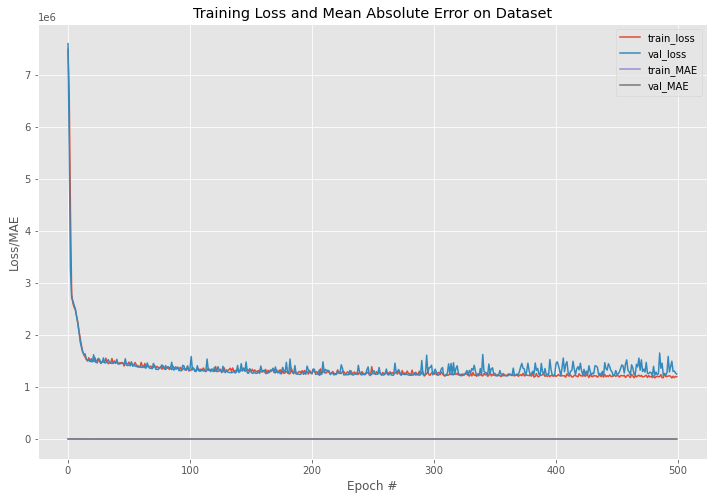

In [34]:
# plot the training loss and accuracy
N = np.arange(0, 500)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
#plt.figure(figure)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="train_MAE")
plt.plot(N, history.history["val_mae"], label="val_MAE")
plt.title("Training Loss and Mean Absolute Error on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend(loc="upper right")
#plt.savefig(args["plot"])

In [35]:
# Applying the same transformations to test dataset
# Outlet_Establishment_year does not carry any significance so adding the age of Outlet
# adding extra feature of Outlet_Age = max(Outlet_Establishment_Year)-(Outlet_Establishment_year)
test['Outlet_Age']=test['Outlet_Establishment_Year'].max() - test['Outlet_Establishment_Year']

In [36]:
submission = test[['Item_Identifier','Outlet_Identifier']].copy()

In [37]:
# at first droping item identifier , outlet_identifier , outlet establishment year
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [38]:
test['Item_Visibility']=test['Item_Visibility'].mask(test['Item_Visibility']==0.0)

In [39]:
test.isna().sum()

Item_Weight              976
Item_Fat_Content           0
Item_Visibility          353
Item_Type                  0
Item_MRP                   0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Age                 0
dtype: int64

In [40]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)
test['Item_Visibility'].fillna(test['Item_Visibility'].mean(),inplace=True)

In [41]:
# checking the categorical variables
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [42]:
# Unifying categories to Low Fat and Regular only
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [43]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
test['Item_Fat_Content']=label_encoder.fit_transform(test['Item_Fat_Content']) 
#,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
test['Outlet_Size']=label_encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=label_encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=label_encoder.fit_transform(test['Outlet_Type'])
test['Item_Type']=label_encoder.fit_transform(test['Item_Type'])
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750000,0,0.007565,13,107.8622,1,0,1,10
1,8.300000,1,0.038428,4,87.3198,1,1,1,2
2,14.600000,0,0.099575,11,241.7538,1,2,0,11
3,7.315000,0,0.015388,13,155.0340,1,1,1,2
4,12.695633,1,0.118599,4,234.2300,1,2,3,24


In [44]:
#normalizing the test from 0 to 1 using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
test=min_max_scaler.fit_transform(test)
test[:5]

array([[0.96427508, 0.        , 0.01241517, 0.86666667, 0.32341312,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.22298303, 1.        , 0.10884773, 0.26666667, 0.23584901,
        0.5       , 0.5       , 0.33333333, 0.08333333],
       [0.59809467, 0.        , 0.29990547, 0.73333333, 0.89413994,
        0.5       , 1.        , 0.        , 0.45833333],
       [0.16433462, 0.        , 0.03686028, 0.86666667, 0.52448781,
        0.5       , 0.5       , 0.33333333, 0.08333333],
       [0.48470577, 1.        , 0.35934822, 0.26666667, 0.86206897,
        0.5       , 1.        , 1.        , 1.        ]])

In [45]:
predictions = model.predict(test)

In [46]:
submission['Item_Outlet_Sales']=predictions
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1663.343018
1,FDW14,OUT017,1409.616577
2,NCN55,OUT010,743.222900
3,FDQ58,OUT017,2461.905029
4,FDY38,OUT027,5438.068848
...,...,...,...
5676,FDB58,OUT046,2290.447021
5677,FDD47,OUT018,2294.409424
5678,NCO17,OUT045,1463.819336
5679,FDJ26,OUT017,3359.967529


In [47]:
submission.to_csv('submission.csv',index=False)